# Практическая работа №2: Моделирование и анализ линейных комбинаций дискретных сигналов

Выполнили студенты гр. 0303 Тишкин Максим и Торопыгин Антон. Вариант №1.

## Цель работы

Изучить математическое описание линейных комбинаций дискретных гармонических сигналов и овладеть программными средствами их моделирования.

## Основные теоретические положения

В теории цифровой обработки сигналов (ЦОС) принято разделять операции дискретизации по времени и квантования по уровню. Полагая операцию квантования отсутствующей, изучают дискретные сигналы и линейные дискретные системы (ЛДС), а затем, отдельано, - эффекты нелинейной операции квантования. 

Дискретным называют сигнал, дискретный по времени и непрерывный по состоянию (уровню), который описывается последовательностью чисел бесконечной разрядность $x(nT)$ или $x(n)$, называемой коротко последовательностью. Значения $nT, n \in Z_{+}$, называют дискретным временем, где $T$ - период дискретизации, а $n$ - дискретным нормированным временем. 

В теории ЦОС термины "дискретный сигнал" и "последовательность" употребляют в тождественном смысле. 

Цифровым называют сигнал, дискретный по времени и квантованный по состоянию (уровню), который описывается последовательностью чисел конечной разрядности - квантованной последовательностью $\tilde{x}(nT)$ или $\tilde{x}(n)$. При компьютерном моделировании под дискретным сигналом условно понимают последовательность чисел максимально возможной разрядности, а под цифровым - последовательность чисел заданной разрядности. 

## Постановка задачи
С помощью программных средств провести моделирование и анализ линейных комбинацций дискретных гармонических последовательностей. Результаты подкрепить соответствующими графиками и выводами.

## Выполнение работы

Прежде чем приступать к выполнению работы, проинициализируем необходимые переменные

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import math


def init_var():
    variables = {'Nb': 1}
    variables['N'] = 30 + variables['Nb'] % 5
    variables['T'] = 0.0005 * (1 + variables['Nb'] % 3)
    variables['a'] = (-1) ** variables['Nb'] * (0.8 + 0.005 * variables['Nb'])
    variables['n0'] = variables['Nb'] % 5 + 3
    variables['U'] = variables['Nb']
    variables['w0'] = math.pi / (6 + variables['Nb'] % 5)
    variables['n_imp'] = variables['Nb'] % 5 + 5
    variables['a1'] = 1.5 - variables['Nb'] % 5
    variables['a2'] = 0.7 + variables['Nb'] % 5
    variables['a3'] = 1.4 + variables['Nb'] % 5
    variables['B1'] = 1.5 + variables['Nb'] % 5
    variables['B2'] = 5.7 - variables['Nb'] % 5
    variables['B3'] = 2.2 + variables['Nb'] % 5
    variables['w1'] = math.pi / (4 + variables['Nb'] % 5)
    variables['w2'] = math.pi / (8 + variables['Nb'] % 5)
    variables['w3'] = math.pi / (16 + variables['Nb'] % 5)
    
    variables['x1'] = lambda k: variables['B1'] * np.sin(variables['w1'] * k)
    variables['x2'] = lambda k: variables['B2'] * np.sin(variables['w2'] * k)
    variables['x3'] = lambda k: variables['B3'] * np.sin(variables['w3'] * k)

    return variables


vars = init_var()
x = np.linspace(0, (vars['N'] - 1) * vars['T'])
x_norm = np.linspace(0, vars['N'] - 1, 33)

1) Смоделируем дискретный прямоугольный импульс $s_1(k)$ на основе дискретного единичного скачка.
$$
s_1(k) = \begin{cases}
U, n_0 \le n \le n_0 + n_{imp} + 1 \\
0, иначе
\end{cases}$$
Результат представлен ниже.

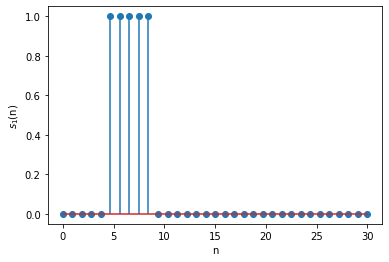

In [49]:
def rect(_x, m=vars['n0']):
    y = np.zeros(_x.shape)
    y[(m <= _x) & (_x <= m + vars['n_imp'] - 1)] = vars['U']
    return y


def task1():
    plt.stem(x_norm, rect(x_norm))
    plt.ylabel(r'$s_{1}$(n)')
    plt.xlabel('n')
    plt.show()

task1()

Моделирование прямоугольного импульс происходит при помощи генерирования массива из нулей с количеством элементов, соответствующих интервалу времени, с последующим заполнением массива согласно условию U.

2) Смоделируем линейную комбинацию дискретных гармонических сигналов $s_2(k)$:
$$s_2(k) = a_1x_1(k) + a_2x_2(k) + a_3x_3(k),$$ где $$x_i(k) = B_isin(\omega ik)$$

Графики последовательностей $s_2(k), x_1(k), x_2(k), x_3(k)$ представлены ниже.

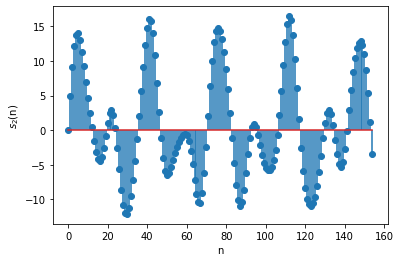

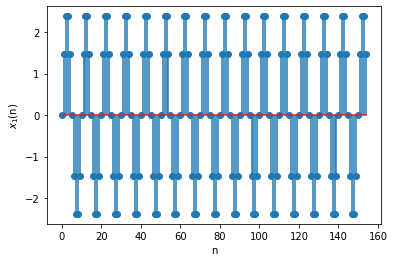

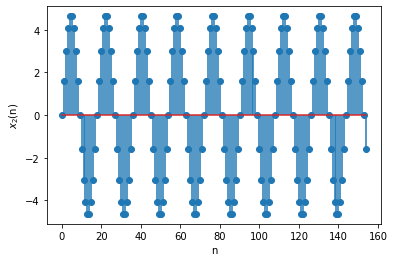

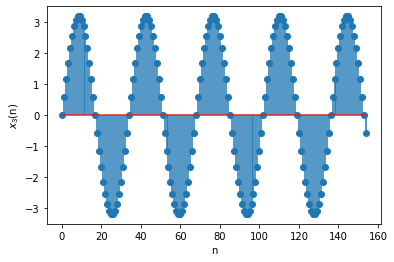

Среднее - 0.8251426335869714, Энергия - 9493.592607246534, Мощность - 61.248984562880864


In [52]:
def s2(_x):
    return vars['a1'] * vars['x1'](_x) + vars['a2'] * vars['x2'](_x) + vars['a3'] * vars['x3'](_x)

x_7 = np.linspace(0, 5 * vars['N'] - 1, 5 * vars['N'])


def task2():
    ans = s2(x_7)
    plt.stem(x_7, ans)
    plt.ylabel(r'$s_{2}$(n)')
    plt.xlabel('n')
    plt.show()
    plt.stem(x_7, vars['x1'](x_7))
    plt.ylabel(r'$x_{1}$(n)')
    plt.xlabel('n')
    plt.show()
    plt.stem(x_7, vars['x2'](x_7))
    plt.ylabel(r'$x_{2}$(n)')
    plt.xlabel('n')
    plt.show()
    plt.stem(x_7, vars['x3'](x_7))
    plt.ylabel(r'$x_{3}$(n)')
    plt.xlabel('n')
    plt.show()

    print('Среднее - {}, Энергия - {}, Мощность - {}'.format(ans.mean(), np.power(ans, 2).sum(), np.power(ans, 2).mean()))
    
task2()

а) Операции при моделировании линейной комбинации сигналов:
- Вычисление дискретного нормированного времени
- Вычисление матрицы дискретных гармоник
- Линейная комбинация дискретных гармоник

б) Определение характеристик:
- Среднее значение: $mean_{s2} = \frac{1}{N}\sum_{i = 0} ^ {N = 1} x_i$
- Энергия: $E = \sum x^2$
- Мощность: $P = \frac{\sum x^2}{N}$

3) Смоделируем дискретную затухающую синусоиду:
$$s_3(k) = |a|^k cos(\hat{\omega_0}k)$$

График дискретной затухающей синусоиды представлен ниже.

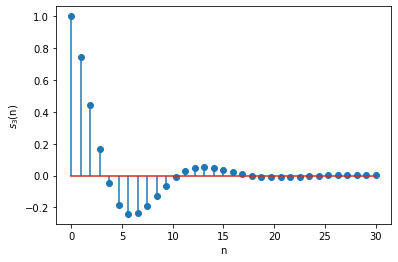

In [53]:
def s3(_x):
    return (np.abs(vars['a']) ** _x) * np.cos(vars['w0'] * _x)


def task3():
    plt.stem(x_norm, s3(x_norm))
    plt.ylabel(r'$s_{3}$(n)')
    plt.xlabel('n')
    plt.show()
    
task3()

Операции при моделировании сигнала:
- Расчёт времени на интервале
- Расчёт затухающей синусоиды

Выведем график пяти периодов периодической последовательности $s_4(k)$ дискретных прямоугольных импульсов амплитуды $U$ и длительности $n_{imp}$ с периодом, вдвое большим длительности импульса. График представлен ниже.

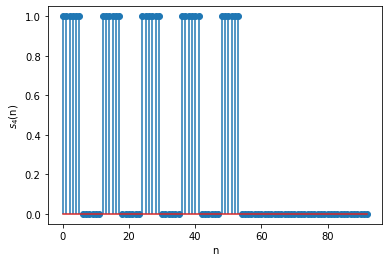

In [54]:
def task4():
    x_9 = np.linspace(0, 3 * vars['N'] - 1, 3 * vars['N'])
    y = np.zeros(shape=x_9.shape)

    for i in range(5):
        y += rect(x_9, 2 * vars['n_imp'] * i)

    plt.stem(x_9, y)
    plt.ylabel(r'$s_{4}$(n)')
    plt.xlabel('n')
    plt.show()
    
task4()

Операции при моделировании периодической последовательности:
- Генирируем 5 прямоугольных импульсов со смещением
- Складываем их.

## Выводы

Были изучены математические описания дискретных сигналов и получены навыки использования программных средств их моделироавния.

Был исследован дискретный прямоугольный импульс на интервале времени на основе цифрового единичного скачка.

Была исследована линейная комбинация дискретных гармонических сигналов на интервале времени; были вычислены её среднее значение, энергия и средняя мощность.

Была исследована дискретная затухающая синусоида на интервале времени.

Была исследована периодическая последовательность дискретных сигналов прямоугольных импульсов на интервале времени.

Таким образом, в ходе работы были смоделированы различные дискретные сигналы и построены соответствующие графики.